**Name:-** Shan Khanna
**Project Title:-** Heart Attack Prediction Using ML Models
**Registration Number:-** 24PG00116

# Heart Attack Detection (Classification)

## Implementing KNN Classifier For Heart Attack Detection

In [ ]:
Reference:

K-NN Algorithm Used for Heart Attack Detection

DOI: 10.52981/fjes.v11i1.758

Bah Ibrahima, Xue Yu , 2021-12-15

In [ ]:
#Import the required libraries
# Data Management
import pandas as pd
import numpy as np



In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Modeling & Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Read the data
df = pd.read_csv('cardio_train.csv', sep = ';')

# Descriptive Analysis

In [ ]:
# Extension to the paper
#Sample data screening
#check the data size
#check the data type
#check the stats

In [ ]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
df.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [ ]:
#checking for null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.drop(columns=['id'], inplace=True)

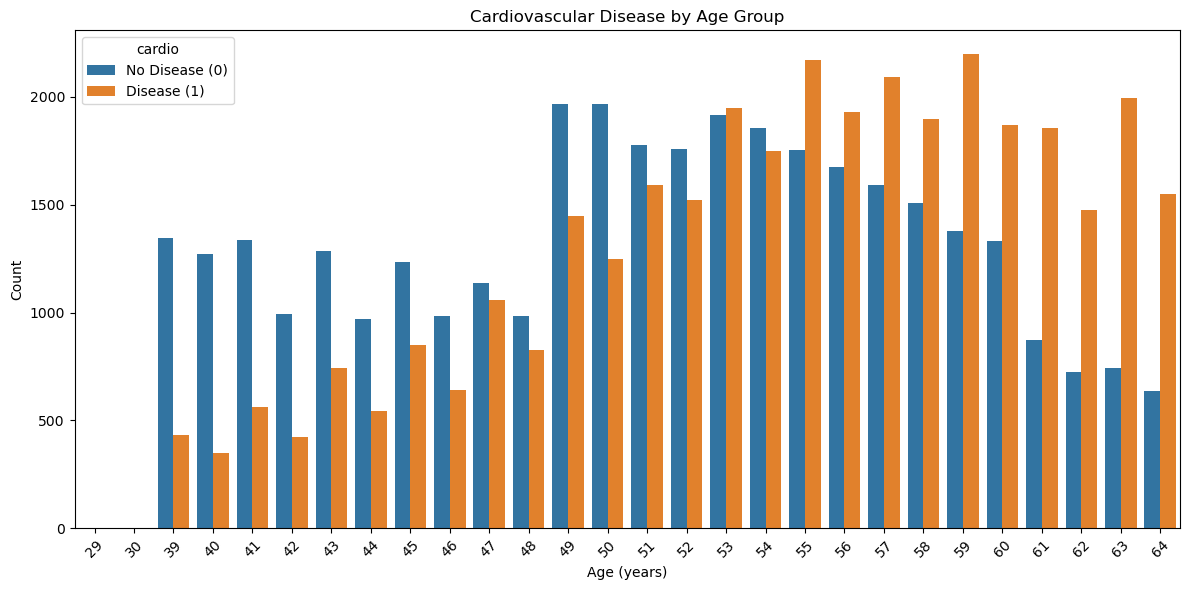

In [ ]:
# Convert age in days to years (if not already done)
df['age_years'] = (df['age'] / 365).astype(int)

# Grouped bar plot of age vs cardio status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_years', hue='cardio')

plt.title('Cardiovascular Disease by Age Group')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(title='cardio', labels=['No Disease (0)', 'Disease (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

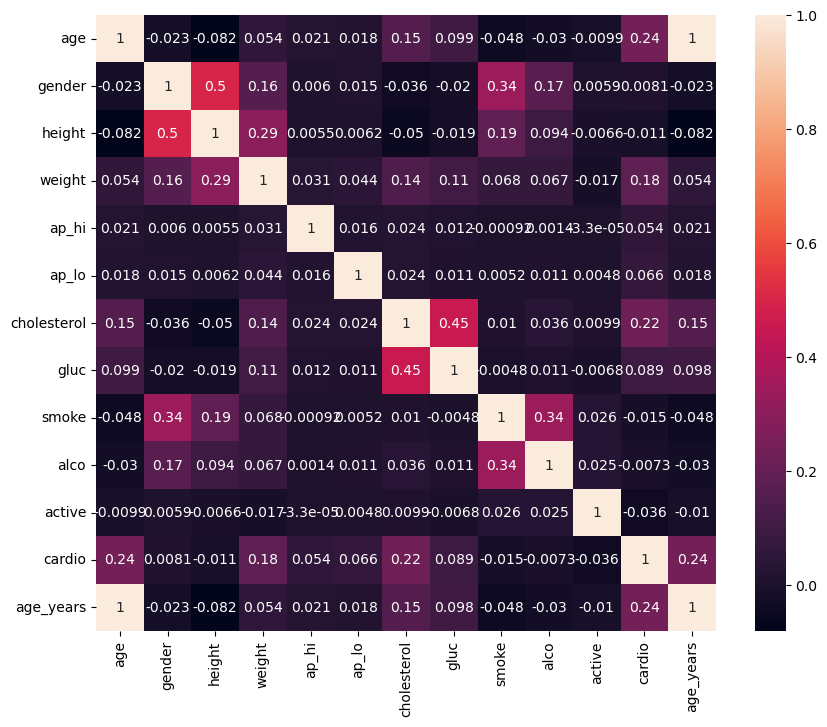

In [ ]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr, annot=True)


In [ ]:
# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Rename for height_weight
df['height_weight'] = df['weight'] / ((df['height'] / 100) ** 2)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.000000,48.000000,53.000000,58.000000,64.000000
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.000000,0.000000,0.000000,1.000000


count    64307.000000
mean        27.453385
std          5.091167
min         13.520822
25%         23.875115
50%         26.370238
75%         30.116213
max         65.356721
Name: height_weight, dtype: float64


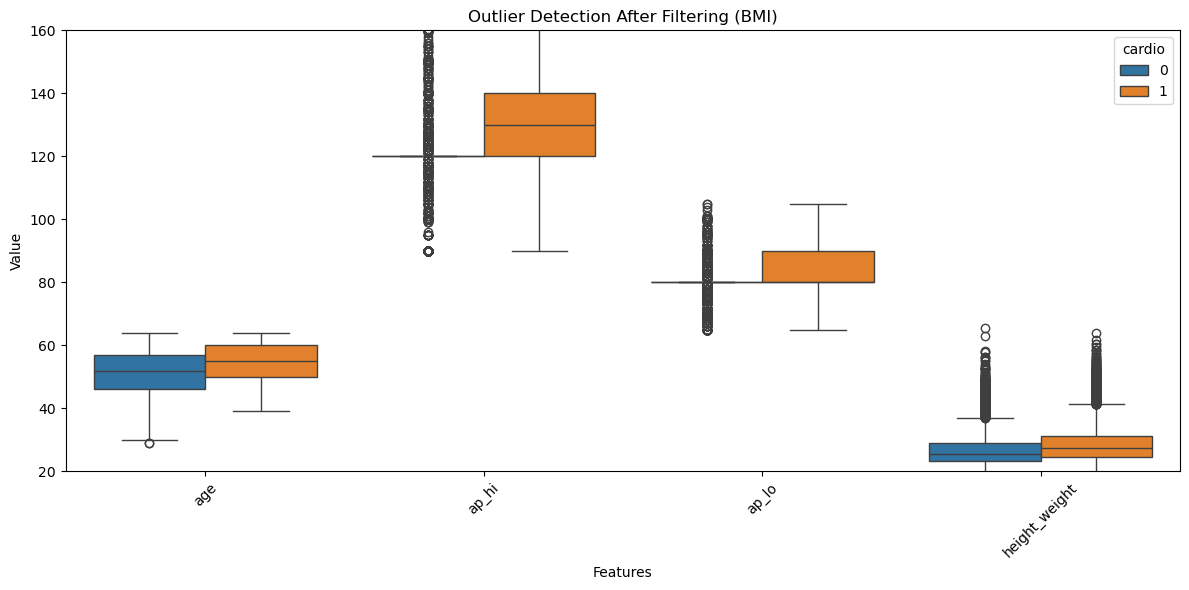

In [ ]:
# Filter out outliers based on realistic individual ranges
df_filtered = df[
    (df['ap_hi'] >= 90) & (df['ap_hi'] <= 170) &
    (df['ap_lo'] >= 65) & (df['ap_lo'] <= 105) &
    (df['height'] >= 140) & (df['height'] <= 210) &
    (df['weight'] >= 40) & (df['weight'] <= 160)
].copy()

# Calculate BMI (correct height_weight)
df_filtered['height_weight'] = df_filtered['weight'] / ((df_filtered['height'] / 100) ** 2)

# Summary statistics to confirm
print(df_filtered['height_weight'].describe())

# Prepare for plotting
features = ['age', 'ap_hi', 'ap_lo', 'height_weight']
df_melted = df_filtered.melt(id_vars='cardio', value_vars=features,
                             var_name='features', value_name='value')

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='features', y='value', hue='cardio')
plt.ylim(20, 160)  # Adjust y-axis scale if needed
plt.title('Outlier Detection After Filtering (BMI)')
plt.xlabel('Features'); plt.ylabel('Value'); plt.legend(title='cardio'); plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Table of Filtered data
df_filtered.describe().T


,count,mean,std,min,25%,50%,75%,max
age,64307.0,52.904489,6.741726,29.000000,48.000000,54.000000,58.000000,64.000000
gender,64307.0,1.352030,0.477607,1.000000,1.000000,1.000000,2.000000,2.000000
height,64307.0,164.556938,7.771189,140.000000,159.000000,165.000000,170.000000,207.000000
weight,64307.0,74.239103,13.931777,40.000000,65.000000,72.000000,82.000000,160.000000
ap_hi,64307.0,126.633477,14.385198,90.000000,120.000000,120.000000,140.000000,170.000000
ap_lo,64307.0,81.793646,7.711950,65.000000,80.000000,80.000000,90.000000,105.000000
cholesterol,64307.0,1.364439,0.680410,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,64307.0,1.225605,0.572585,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,64307.0,0.087704,0.282867,0.000000,0.000000,0.000000,0.000000,1.000000
alco,64307.0,0.053074,0.224182,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# Step 1: Select features and target
features = ['age', 'ap_hi', 'ap_lo', 'height_weight']
X = df_filtered[features]
y = df_filtered['cardio']

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Distance metrics to use
distance_metrics = {
    'Euclidean (p=2)': {'metric': 'minkowski', 'p': 2},
    'Manhattan (p=1)': {'metric': 'minkowski', 'p': 1},
    'Minkowski (p=3)': {'metric': 'minkowski', 'p': 3}
}

# Step 5: Train and evaluate KNN for each metric
for name, params in distance_metrics.items():
    print(f"\n----- {name} -----")

    knn = KNeighborsClassifier(n_neighbors=3, metric=params['metric'], p=params['p'])
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, target_names=["No disease", "Has disease"])
    print(report)


----- Euclidean (p=2) -----
              precision    recall  f1-score   support

  No disease       0.65      0.66      0.66      6451
 Has disease       0.65      0.64      0.65      6411

    accuracy                           0.65     12862
   macro avg       0.65      0.65      0.65     12862
weighted avg       0.65      0.65      0.65     12862


----- Manhattan (p=1) -----
              precision    recall  f1-score   support

  No disease       0.65      0.66      0.66      6451
 Has disease       0.65      0.64      0.65      6411

    accuracy                           0.65     12862
   macro avg       0.65      0.65      0.65     12862
weighted avg       0.65      0.65      0.65     12862


----- Minkowski (p=3) -----
              precision    recall  f1-score   support

  No disease       0.65      0.66      0.66      6451
 Has disease       0.66      0.64      0.65      6411

    accuracy                           0.65     12862
   macro avg       0.65      0.65      0.

In [ ]:
#Modeling & Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
# --- Feature Selection ---
features = ['age', 'ap_hi', 'ap_lo', 'height_weight']
X = df_filtered[features]
y = df_filtered['cardio']

# Considered 80% training and 20% testing

In [ ]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- KNN Classifier (Default is Euclidean) ---
print("\n----- KNN Classifier (k=3, default metric) -----")
knn = KNeighborsClassifier(n_neighbors=3)  # No metric specified
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn, target_names=["No disease", "Has disease"]))


----- KNN Classifier (k=3, default metric) -----
              precision    recall  f1-score   support

  No disease       0.65      0.66      0.66      6451
 Has disease       0.65      0.64      0.65      6411

    accuracy                           0.65     12862
   macro avg       0.65      0.65      0.65     12862
weighted avg       0.65      0.65      0.65     12862



In [ ]:
# --- Decision Tree Classifier ---
print("\n----- Decision Tree Classifier -----")
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=["No disease", "Has disease"]))


----- Decision Tree Classifier -----
              precision    recall  f1-score   support

  No disease       0.61      0.67      0.64      6451
 Has disease       0.63      0.57      0.60      6411

    accuracy                           0.62     12862
   macro avg       0.62      0.62      0.62     12862
weighted avg       0.62      0.62      0.62     12862



In [ ]:
# --- Naive Bayes Classifier ---
print("\n----- Naive Bayes Classifier -----")
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_nb, target_names=["No disease", "Has disease"]))


----- Naive Bayes Classifier -----
              precision    recall  f1-score   support

  No disease       0.67      0.82      0.74      6451
 Has disease       0.77      0.58      0.66      6411

    accuracy                           0.70     12862
   macro avg       0.72      0.70      0.70     12862
weighted avg       0.72      0.70      0.70     12862



# Considered 90% training and 10% testing

In [ ]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [ ]:
# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- KNN Classifier (Default is Euclidean) ---
print("\n----- KNN Classifier (k=3, default metric) -----")
knn = KNeighborsClassifier(n_neighbors=3)  # No metric specified
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn, target_names=["No disease", "Has disease"]))


----- KNN Classifier (k=3, default metric) -----
              precision    recall  f1-score   support

  No disease       0.65      0.65      0.65      3225
 Has disease       0.65      0.65      0.65      3206

    accuracy                           0.65      6431
   macro avg       0.65      0.65      0.65      6431
weighted avg       0.65      0.65      0.65      6431



In [ ]:
# --- Decision Tree Classifier ---
print("\n----- Decision Tree Classifier -----")
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=["No disease", "Has disease"]))


----- Decision Tree Classifier -----
              precision    recall  f1-score   support

  No disease       0.62      0.67      0.64      3225
 Has disease       0.64      0.58      0.61      3206

    accuracy                           0.63      6431
   macro avg       0.63      0.63      0.63      6431
weighted avg       0.63      0.63      0.63      6431



In [ ]:
# --- Naive Bayes Classifier ---
print("\n----- Naive Bayes Classifier -----")
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_nb, target_names=["No disease", "Has disease"]))


----- Naive Bayes Classifier -----
              precision    recall  f1-score   support

  No disease       0.67      0.82      0.74      3225
 Has disease       0.77      0.59      0.67      3206

    accuracy                           0.71      6431
   macro avg       0.72      0.71      0.70      6431
weighted avg       0.72      0.71      0.70      6431



# K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale entire dataset (no train/test split here)

# --- K-Fold Cross-Validation ---
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# --- KNN Classifier (k=3, default metric = Euclidean) ---
print("\n----- KNN Classifier (k=3, with K-Fold Cross-Validation) -----")
knn = KNeighborsClassifier(n_neighbors=5)

# Get cross-validated predictions
y_pred_cv = cross_val_predict(knn, X_scaled, y, cv=kfold)

# Evaluation
print(classification_report(y, y_pred_cv, target_names=["No disease", "Has disease"]))



----- KNN Classifier (k=3, with K-Fold Cross-Validation) -----
              precision    recall  f1-score   support

  No disease       0.67      0.69      0.68     32252
 Has disease       0.68      0.67      0.67     32055

    accuracy                           0.68     64307
   macro avg       0.68      0.68      0.68     64307
weighted avg       0.68      0.68      0.68     64307



# Confusion Matrix

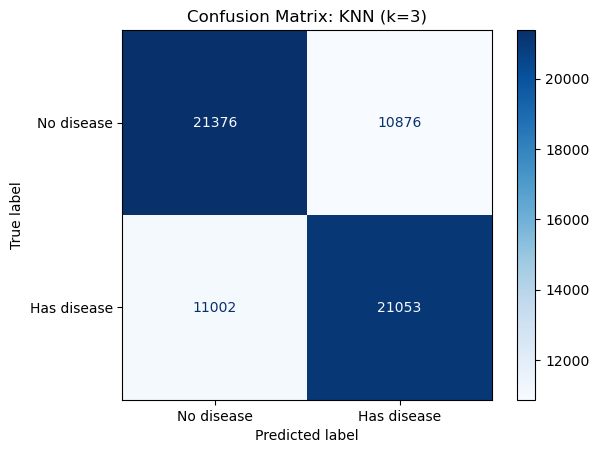

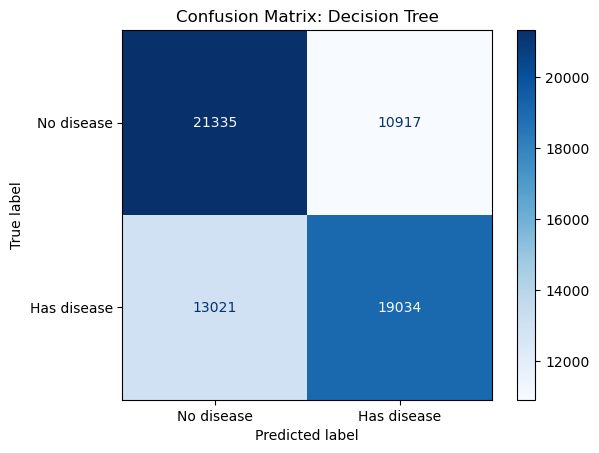

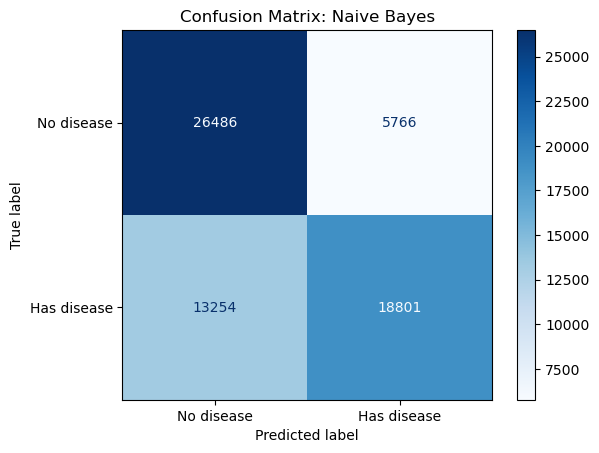

In [ ]:
# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Fold setup ---
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Models ---
models = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# --- Plot Confusion Matrix for each model ---
for name, model in models.items():
    y_pred = cross_val_predict(model, X_scaled, y, cv=kfold)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No disease", "Has disease"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

**Insights**:- **Key Insights from EDA on Heart Disease Dataset
Age vs. Heart**

There is a clear increase in heart disease prevalence with age.

The majority of patients with cardiovascular conditions are above 50 years.

Blood Pressure Patterns

Both systolic (ap_hi) and diastolic (ap_lo) blood pressure show significantly higher values in the heart disease group.

This confirms hypertension as a strong risk factor.

BMI (Body Mass Index)

After computing BMI from height and weight, it was observed that higher BMI is correlated with heart disease.

The average BMI is notably greater in the affected group, indicating that overweight individuals are more prone.

Outlier Removal Enhanced Clarity

Filtering unrealistic height, weight, and blood pressure values helped in removing noise and provided more accurate trends in the boxplots and correlation matrix.

Feature Correlation Observations

ap_hi and ap_lo are strongly positively correlated, which makes sense physiologically.

age, cholesterol, and glucose levels also have moderate positive correlation with the target cardio.

Box Plot Visualization

Boxplots visually confirmed that patients with heart disease typically have higher median age, BMI, and blood pressure.

These visual patterns validated the feature importance for model selection.

No Missing Values

The dataset was clean with no null values, which simplified preprocessing and analysis.